In [5]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [8]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [10]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement
Station = Base.classes.station
session = Session(engine)
# reflect the tables
measurement_data = session.query(Measurement).first()
print(measurement_data)

In [13]:
# View all of the classes that automap found
Base = automap_base()
Base.prepare(engine, reflect=True)
reflected_classes = Base.classes
reflected_class_names = list(reflected_classes.keys())
print(reflected_class_names)

['measurement', 'station']


In [14]:
# Save references to each table
print("Measurement class:", Measurement)
print("Station class:", Station)

Measurement class: <class 'sqlalchemy.ext.automap.measurement'>
Station class: <class 'sqlalchemy.ext.automap.station'>


In [15]:
# Create our session (link) from Python to the DB
from sqlalchemy.orm import Session
from sqlalchemy import create_engine

engine = create_engine("sqlite:///Resources/hawaii.sqlite")

session = Session(engine)

In [ ]:
#to close current session
#session.close()

# Exploratory Precipitation Analysis

In [18]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent_date[0])


2017-08-23


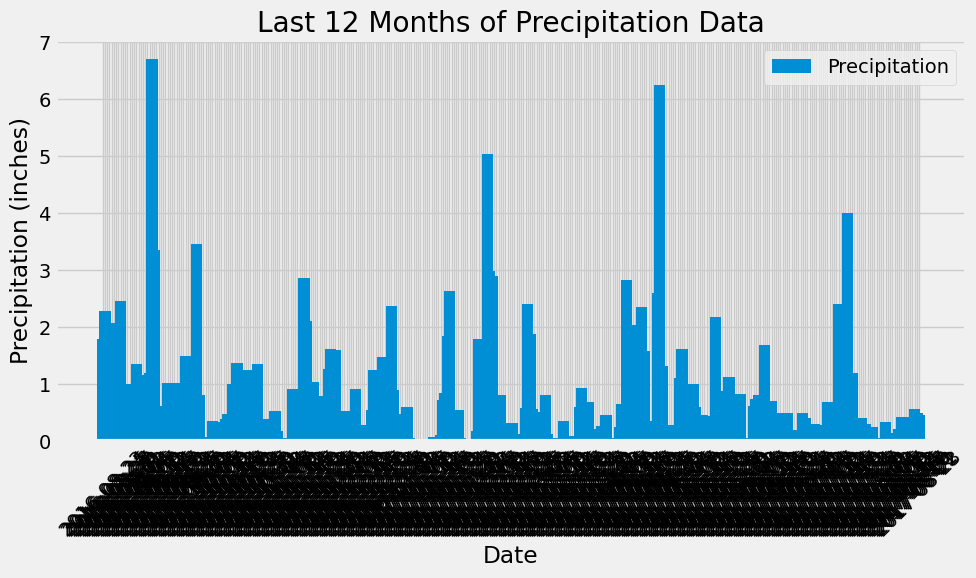

In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
Base = automap_base()
Base.prepare(engine, reflect=True)

# Access the reflected classes
Measurement = Base.classes.measurement

# Create a session
session = Session(engine)

# Find the most recent date in the dataset
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]

# Calculate the date one year from the most recent date
one_year_ago = (pd.to_datetime(most_recent_date) - pd.DateOffset(years=1)).strftime('%Y-%m-%d')

# Perform a query to retrieve the last 12 months of precipitation data
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).\
    order_by(Measurement.date).all()

# Close the session
session.close()

# Save the query results as a Pandas DataFrame and set column names
df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Sort the DataFrame by date
df = df.sort_values('Date')

# Plot the data using Pandas Plotting with Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(df['Date'], df['Precipitation'], width=5, label='Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Last 12 Months of Precipitation Data')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Inches')

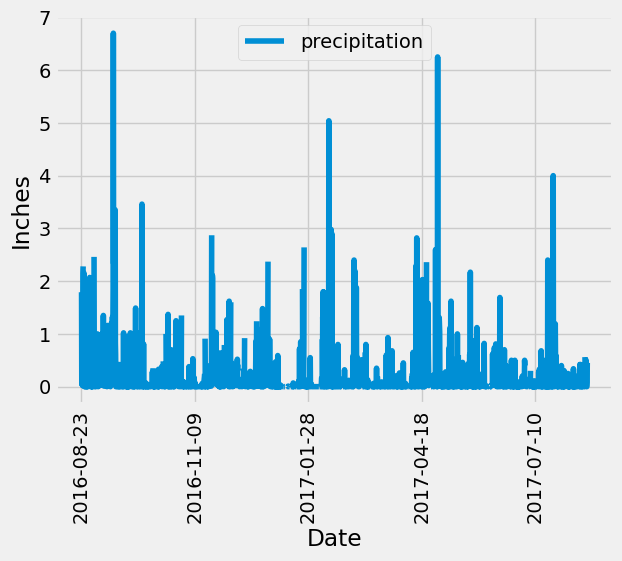

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [25]:
# Use Pandas to calculate the summary statistics for the precipitation dataBase = automap_base()
Base.prepare(engine, reflect=True)

# Access the reflected classes
Measurement = Base.classes.measurement

# Create a session
session = Session(engine)

# Calculate the date one year from the most recent date
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
one_year_ago = (pd.to_datetime(most_recent_date) - pd.DateOffset(years=1)).strftime('%Y-%m-%d')

# Perform a query to retrieve the last 12 months of precipitation data
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).\
    order_by(Measurement.date).all()

# Close the session
session.close()

# Save the query results as a Pandas DataFrame
df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Calculate summary statistics
summary_stats = df['Precipitation'].describe()

# Print the summary statistics
print(summary_stats)

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64


/var/folders/pc/786jf2515nb92rvjwjlzd0sm0000gn/T/ipykernel_94527/3469220234.py:2: SAWarning: This declarative base already contains a class with the same class name and module name as sqlalchemy.ext.automap.measurement, and will be replaced in the string-lookup table.
  Base.prepare(engine, reflect=True)
/var/folders/pc/786jf2515nb92rvjwjlzd0sm0000gn/T/ipykernel_94527/3469220234.py:2: SAWarning: This declarative base already contains a class with the same class name and module name as sqlalchemy.ext.automap.station, and will be replaced in the string-lookup table.
  Base.prepare(engine, reflect=True)


# Exploratory Station Analysis

In [26]:
# Design a query to calculate the total number of stations in the dataset
Base = automap_base()
Base.prepare(engine, reflect=True)

# Access the reflected classes
Station = Base.classes.station

# Create a session
session = Session(engine)

# Design a query to calculate the total number of stations
total_stations = session.query(Station.station).distinct().count()

# Close the session
session.close()

# Print the total number of stations
print("Total number of stations:", total_stations)

Total number of stations: 9


In [27]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
Base = automap_base()
Base.prepare(engine, reflect=True)

# Access the reflected classes
Measurement = Base.classes.measurement

# Create a session
session = Session(engine)

# Design a query to find the most active stations and their counts
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

# Close the session
session.close()

# Print the most active stations and their counts
for station, count in most_active_stations:
    print(f"Station: {station}, Count: {count}")

Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [28]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
Base = automap_base()
Base.prepare(engine, reflect=True)

# Access the reflected classes
Measurement = Base.classes.measurement

# Create a session
session = Session(engine)

# Find the most active station and its ID from the previous query
most_active_station = session.query(Measurement.station).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).first()

# Calculate the lowest, highest, and average temperature for the most active station
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active_station[0]).scalar()
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active_station[0]).scalar()
average_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station[0]).scalar()

# Close the session
session.close()

# Print the results
print(f"Most Active Station: {most_active_station[0]}")
print(f"Lowest Temperature: {lowest_temp}")
print(f"Highest Temperature: {highest_temp}")
print(f"Average Temperature: {average_temp}")

Most Active Station: USC00519281
Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66378066378067


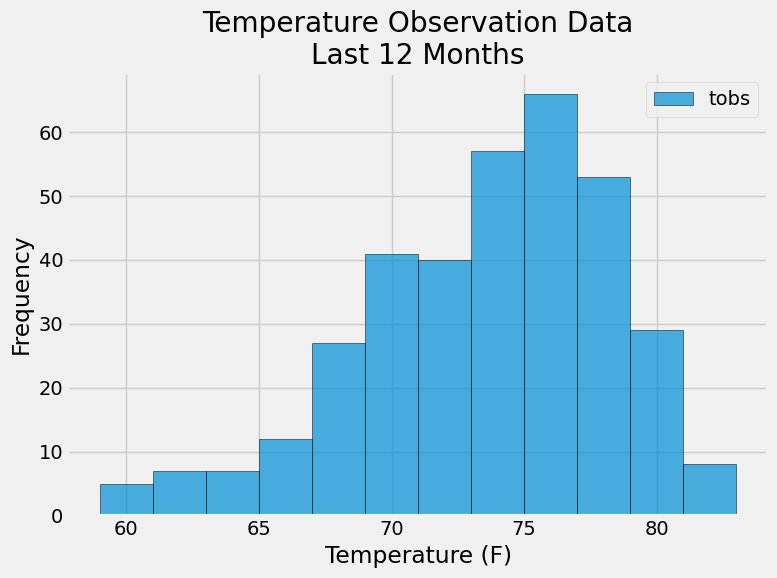

In [29]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Base = automap_base()
Base.prepare(engine, reflect=True)

# Access the reflected classes
Measurement = Base.classes.measurement

# Create a session
session = Session(engine)

# Find the most active station and its ID from the previous query
most_active_station = session.query(Measurement.station).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).first()

# Calculate the date one year from the most recent date
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
one_year_ago = (pd.to_datetime(most_recent_date) - pd.DateOffset(years=1)).strftime('%Y-%m-%d')

# Query the last 12 months of temperature observation data for the most active station
temperature_data = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station[0]).\
    filter(Measurement.date >= one_year_ago).all()

# Close the session
session.close()

# Save the query results as a list
temperature_list = [temp[0] for temp in temperature_data]

# Plot the data as a histogram
plt.figure(figsize=(8, 6))
plt.hist(temperature_list, bins=12, edgecolor='black', alpha=0.7)
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.title('Temperature Observation Data\nLast 12 Months')
plt.legend(['tobs'])
plt.tight_layout()
plt.show()

# Close Session

In [32]:
# Close Session
session.close()

In [34]:
from flask import Flask, jsonify
import datetime as dt
from sqlalchemy import create_engine, func
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base

# Create a Flask app
app = Flask(__name__)

# Create a database engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# Reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)

# Access the reflected classes
Measurement = Base.classes.measurement
Station = Base.classes.station

# Define routes

@app.route("/")
def homepage():
    return (
        "Welcome to the homepage. Available routes:<br>"
        "/api/v1.0/precipitation<br>"
        "/api/v1.0/stations<br>"
        "/api/v1.0/tobs<br>"
        "/api/v1.0/&lt;start&gt;<br>"
        "/api/v1.0/&lt;start&gt;/&lt;end&gt;"
    )

@app.route("/api/v1.0/precipitation")
def precipitation():
    session = Session(engine)
    most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
    one_year_ago = (dt.datetime.strptime(most_recent_date, '%Y-%m-%d') - dt.timedelta(days=365)).strftime('%Y-%m-%d')
    results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()
    session.close()
    precipitation_dict = {date: prcp for date, prcp in results}
    return jsonify(precipitation_dict)

@app.route("/api/v1.0/stations")
def stations():
    session = Session(engine)
    station_names = session.query(Station.station).all()
    session.close()
    station_list = list(np.ravel(station_names))
    return jsonify(station_list)

@app.route("/api/v1.0/tobs")
def tobs():
    session = Session(engine)
    most_active_station = session.query(Measurement.station).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).first()[0]
    most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
    one_year_ago = (dt.datetime.strptime(most_recent_date, '%Y-%m-%d') - dt.timedelta(days=365)).strftime('%Y-%m-%d')
    results = session.query(Measurement.date, Measurement.tobs).\
        filter(Measurement.station == most_active_station).\
        filter(Measurement.date >= one_year_ago).all()
    session.close()
    tobs_list = [tobs for date, tobs in results]
    return jsonify(tobs_list)

@app.route("/api/v1.0/<start>")
@app.route("/api/v1.0/<start>/<end>")
def temp_range(start, end=None):
    session = Session(engine)
    if end is None:
        results = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
            filter(Measurement.date >= start).all()
    else:
        results = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
            filter(Measurement.date >= start).\
            filter(Measurement.date <= end).all()
    session.close()
    temp_stats = {
        "TMIN": results[0][0],
        "TAVG": results[0][1],
        "TMAX": results[0][2]
    }
    return jsonify(temp_stats)

if __name__ == "__main__":
    app.run(debug=True, port=5001)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5001
Press CTRL+C to quit
 * Restarting with watchdog (fsevents)
Traceback (most recent call last):
  File "/Users/zacharykroell/Desktop/MSU/anaconda3/envs/dev/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/zacharykroell/Desktop/MSU/anaconda3/envs/dev/lib/python3.10/site-packages/traitlets/config/application.py", line 991, in launch_instance
    app.initialize(argv)
  File "/Users/zacharykroell/Desktop/MSU/anaconda3/envs/dev/lib/python3.10/site-packages/traitlets/config/application.py", line 113, in inner
    return method(app, *args, **kwargs)
  File "/Users/zacharykroell/Desktop/MSU/anaconda3/envs/dev/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 665, in initialize
    self.init_sockets()
  File "/Users/zacharykroell/Desktop/MSU/anaconda3/envs/dev/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 309, in init_sockets
    self.shell_port = self._bind_socket(self

SystemExit: 1

In [36]:
from flask import Flask, jsonify
import datetime as dt
from sqlalchemy import create_engine, func
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base

app = Flask(__name__)

engine = create_engine("sqlite:///Resources/hawaii.sqlite")

Base = automap_base()
Base.prepare(engine, reflect=True)

Measurement = Base.classes.measurement
Station = Base.classes.station

@app.route("/")
def homepage():
    return (
        "Welcome to the homepage. Available routes:<br>"
        "/api/v1.0/precipitation<br>"
        "/api/v1.0/stations<br>"
        "/api/v1.0/tobs<br>"
        "/api/v1.0/&lt;start&gt;<br>"
        "/api/v1.0/&lt;start&gt;/&lt;end&gt;"
    )

@app.route("/api/v1.0/precipitation")
def precipitation():
    session = Session(engine)
    most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
    one_year_ago = (dt.datetime.strptime(most_recent_date, '%Y-%m-%d') - dt.timedelta(days=365)).strftime('%Y-%m-%d')
    results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()
    session.close()
    precipitation_dict = {date: prcp for date, prcp in results}
    return jsonify(precipitation_dict)

@app.route("/api/v1.0/stations")
def stations():
    session = Session(engine)
    station_names = session.query(Station.station).all()
    session.close()
    station_list = [station[0] for station in station_names]
    return jsonify(station_list)

@app.route("/api/v1.0/tobs")
def tobs():
    session = Session(engine)
    most_active_station = session.query(Measurement.station).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).first()[0]
    most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
    one_year_ago = (dt.datetime.strptime(most_recent_date, '%Y-%m-%d') - dt.timedelta(days=365)).strftime('%Y-%m-%d')
    results = session.query(Measurement.date, Measurement.tobs).\
        filter(Measurement.station == most_active_station).\
        filter(Measurement.date >= one_year_ago).all()
    session.close()
    tobs_list = [tobs for date, tobs in results]
    return jsonify(tobs_list)

@app.route("/api/v1.0/<start>")
@app.route("/api/v1.0/<start>/<end>")
def temp_range(start, end=None):
    session = Session(engine)
    if end is None:
        results = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
            filter(Measurement.date >= start).all()
    else:
        results = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
            filter(Measurement.date >= start).\
            filter(Measurement.date <= end).all()
    session.close()
    temp_stats = {
        "TMIN": results[0][0],
        "TAVG": results[0][1],
        "TMAX": results[0][2]
    }
    return jsonify(temp_stats)

if __name__ == "__main__":
    app.run(debug=True, port=5002)